In [3]:

!pip install -q pandas numpy matplotlib seaborn scipy plotly


In [4]:

!pip install -q seaborn plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display
from pathlib import Path

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,5)


In [5]:
# Small helpers used later
def safe_read_csv(path, **kwargs):
    # use low_memory False to avoid dtype warnings for large CSVs
    return pd.read_csv(path, low_memory=False, **kwargs)

def zscore_outliers_mask(df, cols, thresh=3.0):
    valid = df[cols].dropna()
    if valid.shape[0] == 0:
        return pd.Series(False, index=df.index)
    zs = np.abs(stats.zscore(valid, nan_policy='omit'))
    mask = pd.Series(False, index=df.index)
    mask.loc[valid.index] = (zs > thresh).any(axis=1)
    return mask

def median_impute(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = df[c].fillna(df[c].median())
    return df


In [6]:
from google.colab import files
uploaded = files.upload()


Saving sierraleone-bumbuna.csv to sierraleone-bumbuna.csv
Saving benin-malanville.csv to benin-malanville.csv
Saving togo-dapaong_qc.csv to togo-dapaong_qc.csv


In [9]:

filepath = "/content/benin-malanville.csv"
print("Reading:", filepath)
df = safe_read_csv(filepath)
print("Loaded shape:", df.shape)
display(df.head())


Reading: /content/benin-malanville.csv
Loaded shape: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [10]:

if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce', infer_datetime_format=True)
else:
    raise KeyError("No 'Timestamp' column found — check column names with df.columns")

# Basic info
print("---- dtypes & non-null counts ----")
display(df.info())
print("\n---- Summary stats (numeric) ----")
display(df.describe().T)
print("\n---- Missing value counts ----")
missing = df.isna().sum()
missing_pct = (df.isna().mean() * 100).round(2)
display(pd.concat([missing, missing_pct.rename('missing_pct')], axis=1).sort_values('missing_pct', ascending=False).head(20))


---- dtypes & non-null counts ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       52

/tmp/ipython-input-2848335099.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce', infer_datetime_format=True)


None


---- Summary stats (numeric) ----


,count,mean,min,25%,50%,75%,max,std
Timestamp,525600,2022-02-07 12:00:30.000000512,2021-08-09 00:01:00,2021-11-08 06:00:45,2022-02-07 12:00:30,2022-05-09 18:00:15,2022-08-09 00:00:00,NaN
GHI,525600.0,240.559452,-12.9,-2.0,1.8,483.4,1413.0,331.131327
DNI,525600.0,167.187516,-7.8,-0.5,-0.1,314.2,952.3,261.710501
DHI,525600.0,115.358961,-12.6,-2.1,1.6,216.3,759.2,158.691074
ModA,525600.0,236.589496,0.0,0.0,4.5,463.7,1342.3,326.894859
ModB,525600.0,228.883576,0.0,0.0,4.3,447.9,1342.3,316.536515
Tamb,525600.0,28.179683,11.0,24.2,28.0,32.3,43.8,5.924297
RH,525600.0,54.487969,2.1,28.8,55.1,80.1,100.0,28.073069
WS,525600.0,2.121113,0.0,1.0,1.9,3.1,19.5,1.603466
WSgust,525600.0,2.809195,0.0,1.3,2.6,4.1,26.6,2.02912



---- Missing value counts ----


,0,missing_pct
Comments,525600,100.0
GHI,0,0.0
Timestamp,0,0.0
DNI,0,0.0
DHI,0,0.0
ModB,0,0.0
ModA,0,0.0
RH,0,0.0
WS,0,0.0
WSgust,0,0.0


In [14]:
cols_interest = ['GHI','DNI','DHI','ModA','ModB','Tamb','RH','WS','WSgust','BP','TModA','TModB','Cleaning','Precipitation','WD']
present = [c for c in cols_interest if c in df.columns]
print("Columns of interest present:", present)

missing_report = pd.concat([df.isna().sum(), (df.isna().mean()*100).round(2)], axis=1)
missing_report.columns = ['missing_count','missing_pct']
display(missing_report[missing_report['missing_pct']>5].sort_values('missing_pct',ascending=False))


Columns of interest present: ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'BP', 'TModA', 'TModB', 'Cleaning', 'Precipitation', 'WD']


,missing_count,missing_pct
Comments,525600,100.0


In [15]:
z_cols = [c for c in ['GHI','DNI','DHI','ModA','ModB','WS','WSgust'] if c in df.columns]
print("Using Z-score columns:", z_cols)
df['outlier_flag'] = zscore_outliers_mask(df, z_cols, thresh=3.0)
print("Outliers flagged:", df['outlier_flag'].sum())
display(df.loc[df['outlier_flag']==True, z_cols].head())


Using Z-score columns: ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
Outliers flagged: 7740


,GHI,DNI,DHI,ModA,ModB,WS,WSgust
670,836.0,235.0,610.6,778.8,783.8,3.2,4.1
671,1274.0,698.8,615.2,1210.3,1210.3,3.4,4.1
672,938.0,340.1,612.8,891.1,891.1,3.4,4.6
673,718.5,126.8,593.2,682.6,682.6,4.7,5.6
674,1349.0,771.8,618.0,1281.5,1281.5,4.0,4.6


In [16]:
impute_cols = [c for c in z_cols]
df_clean = df.copy()
df_clean = median_impute(df_clean, impute_cols)
print("Missing after median impute (selected cols):")
display(df_clean[impute_cols].isna().sum())


Missing after median impute (selected cols):


,0
GHI,0
DNI,0
DHI,0
ModA,0
ModB,0
WS,0
WSgust,0


In [17]:

df_clean_ts = df_clean.set_index('Timestamp').sort_index()

daily = df_clean_ts.resample('D').mean()
print("Daily aggregated shape:", daily.shape)
display(daily.head())


Daily aggregated shape: (366, 19)


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,outlier_flag
Timestamp,,,,,,,,,,,,,,,,,,,
2021-08-09,236.276859,84.596108,164.662265,216.780959,217.264211,28.042946,80.529256,1.773106,2.470188,0.482696,178.899375,8.034677,997.433634,0.000000,0.000000,36.804726,34.583808,NaN,0.074357
2021-08-10,216.653958,119.740694,115.361806,198.448056,198.911736,28.493403,80.500694,1.979861,2.627222,0.451597,195.392778,6.776181,996.186806,0.000000,0.003264,35.401042,33.674306,NaN,0.000000
2021-08-11,98.108958,0.972569,97.081667,96.350069,96.189028,25.679167,91.323542,2.201111,2.972431,0.492986,181.220000,7.890833,995.252083,0.001389,0.020347,29.304722,27.938125,NaN,0.001389
2021-08-12,210.430972,104.388403,140.320000,189.359931,189.090000,27.123472,84.211111,1.454792,2.012431,0.393125,150.260556,6.378889,995.748611,0.001389,0.000208,34.490833,32.463958,NaN,0.022222
2021-08-13,121.741667,4.954583,115.950000,121.879792,121.752569,25.649583,91.937014,1.692083,2.329722,0.435694,206.522917,6.513681,996.693750,0.001389,0.002986,29.086319,27.664375,NaN,0.022222


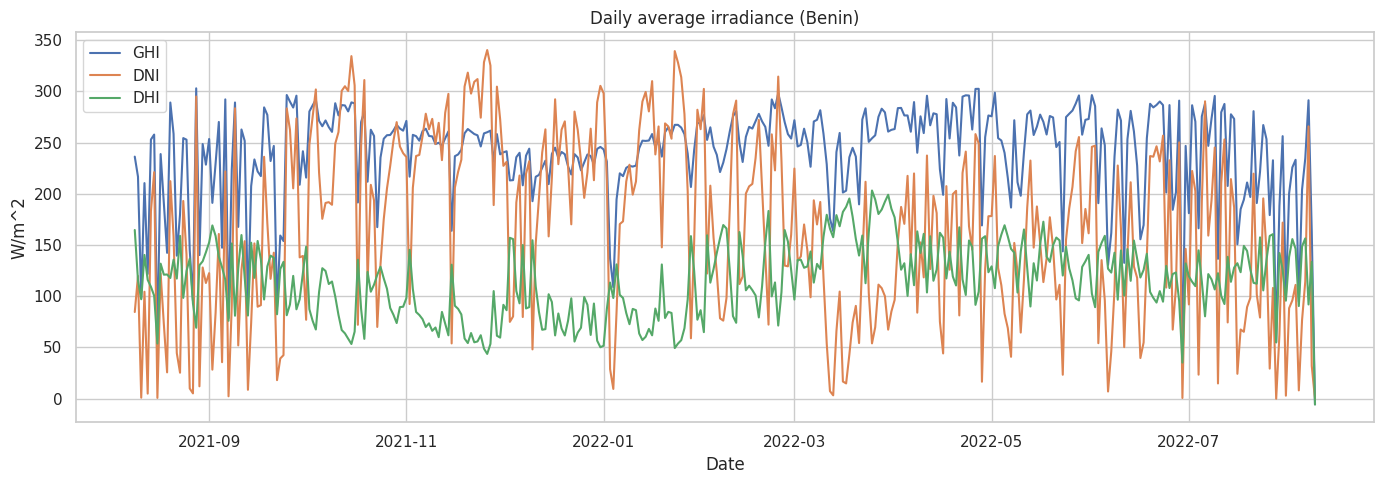

In [18]:
plt.figure(figsize=(14,5))
for col in ['GHI','DNI','DHI']:
    if col in daily.columns:
        plt.plot(daily.index, daily[col], label=col)
plt.title("Daily average irradiance (Benin)")
plt.xlabel("Date")
plt.ylabel("W/m^2")
plt.legend()
plt.tight_layout()
plt.show()


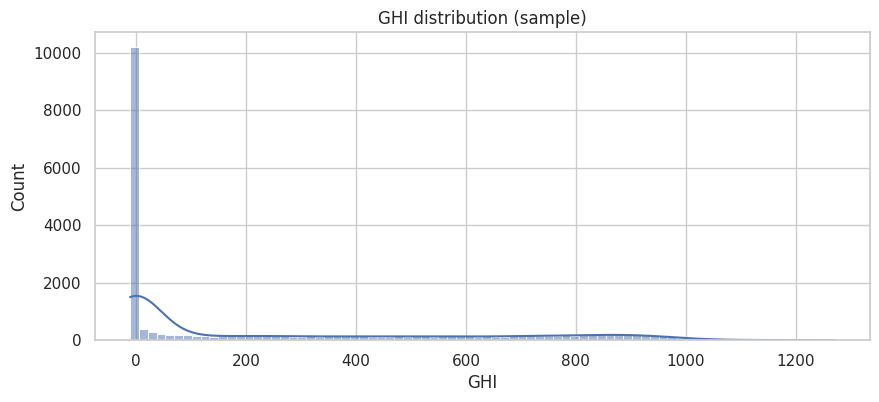

In [19]:
if 'GHI' in df_clean.columns:

    sample = df_clean['GHI'].dropna().sample(n=min(20000, df_clean['GHI'].dropna().shape[0]), random_state=42)
    plt.figure(figsize=(10,4))
    sns.histplot(sample, bins=80, kde=True)
    plt.title("GHI distribution (sample)")
    plt.show()


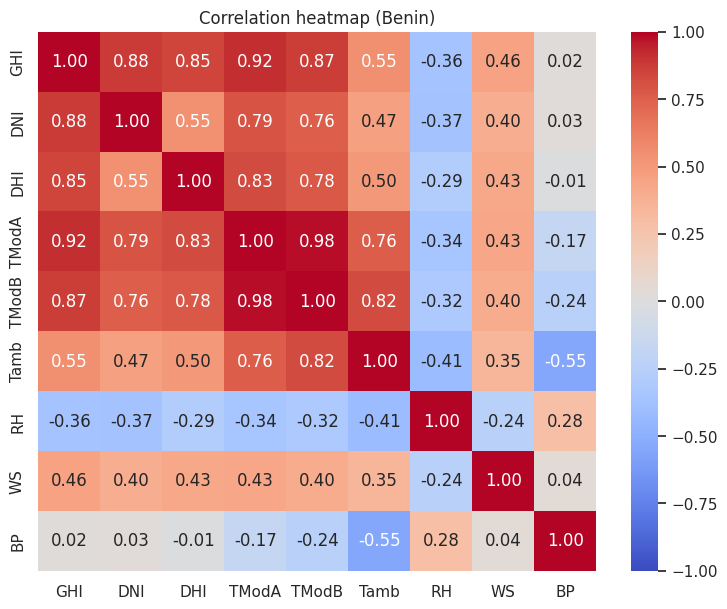

In [20]:
corr_cols = [c for c in ['GHI','DNI','DHI','TModA','TModB','Tamb','RH','WS','BP'] if c in df_clean.columns]
if corr_cols:
    corr = df_clean[corr_cols].corr()
    plt.figure(figsize=(9,7))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
    plt.title("Correlation heatmap (Benin)")
    plt.show()
else:
    print("No correlation columns present.")


,ModA,ModB
Cleaning,,
dirty,236.524253,228.816071
clean,307.229278,301.972165


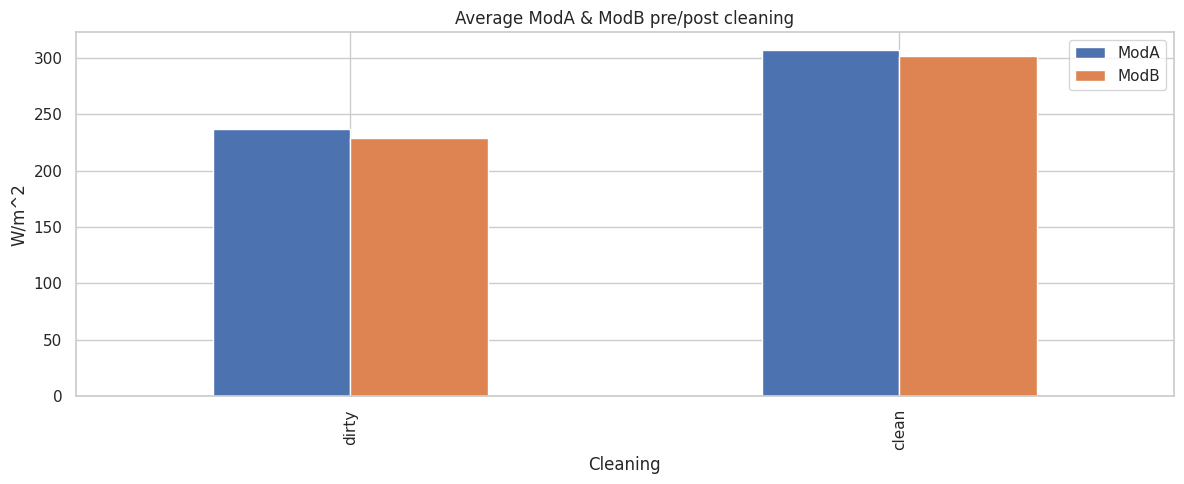

In [21]:
if 'Cleaning' in df_clean.columns and any(c in df_clean.columns for c in ['ModA','ModB']):
    grp = df_clean.groupby('Cleaning')[[c for c in ['ModA','ModB'] if c in df_clean.columns]].mean().rename(index={0:'dirty',1:'clean'})
    display(grp)
    grp.plot(kind='bar', title="Average ModA & ModB pre/post cleaning", ylabel="W/m^2")
    plt.tight_layout()
    plt.show()
else:
    print("Cleaning or ModA/ModB columns missing.")


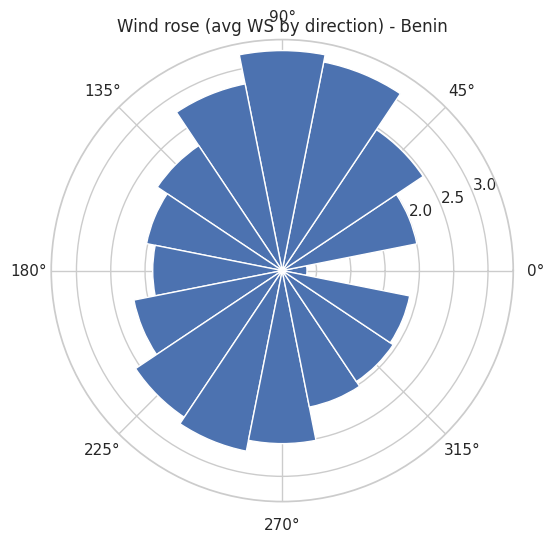

In [22]:
if 'WD' in df_clean.columns and 'WS' in df_clean.columns:
    tmp = df_clean.dropna(subset=['WD','WS']).copy()
    # bin directions into 16 sectors
    tmp['wd_bin'] = (np.floor(tmp['WD'] / 22.5) * 22.5) % 360
    rose = tmp.groupby('wd_bin')['WS'].mean().reset_index().sort_values('wd_bin')
    theta = np.deg2rad(rose['wd_bin'])
    radii = rose['WS']
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='polar')
    ax.bar(theta, radii, width=np.deg2rad(22.5), bottom=0.0)
    ax.set_title("Wind rose (avg WS by direction) - Benin")
    plt.show()
else:
    print("WD or WS column not present for wind rose.")


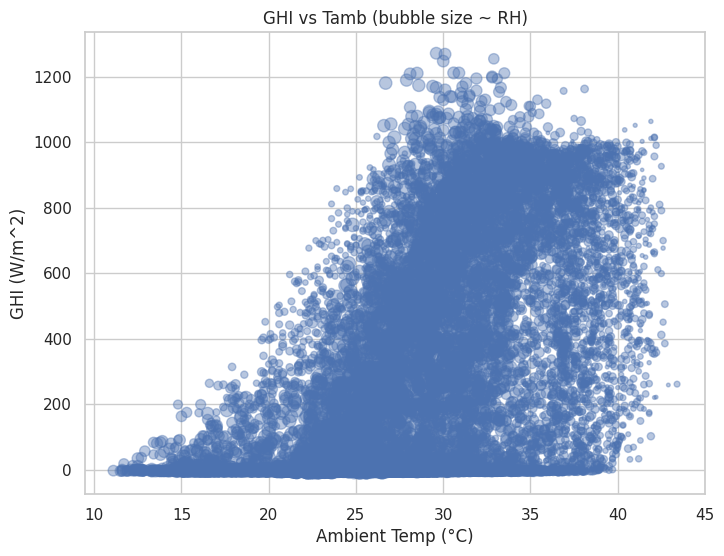

In [23]:
if all(c in df_clean.columns for c in ['GHI','Tamb']):
    sample = df_clean.dropna(subset=['GHI','Tamb'])
    sample = sample.sample(n=min(20000, sample.shape[0]), random_state=42)
    size_col = 'RH' if 'RH' in sample.columns else None
    plt.figure(figsize=(8,6))
    plt.scatter(sample['Tamb'], sample['GHI'], s=(sample[size_col].fillna(0)+1) if size_col else 10, alpha=0.4)
    plt.xlabel("Ambient Temp (°C)")
    plt.ylabel("GHI (W/m^2)")
    plt.title("GHI vs Tamb (bubble size ~ RH)" if size_col else "GHI vs Tamb")
    plt.show()
else:
    print("Need GHI and Tamb columns for bubble chart.")


In [24]:
out_dir = Path("data")
out_dir.mkdir(parents=True, exist_ok=True)
out_path = out_dir / "benin_malanville_clean.csv"
df_clean.reset_index(drop=False, inplace=True)
df_clean.to_csv(out_path, index=False)
print("Saved cleaned CSV to:", out_path)


Saved cleaned CSV to: data/benin_malanville_clean.csv


In [25]:
print("=== Benin quick KPIs ===")
kpis = {}
for metric in ['GHI','DNI','DHI']:
    if metric in df_clean.columns:
        kpis[metric] = {
            'mean': float(df_clean[metric].mean()),
            'median': float(df_clean[metric].median()),
            'std': float(df_clean[metric].std())
        }
import json
print(json.dumps(kpis, indent=2))


=== Benin quick KPIs ===
{
  "GHI": {
    "mean": 240.559452435312,
    "median": 1.8,
    "std": 331.13132727528244
  },
  "DNI": {
    "mean": 167.18751598173515,
    "median": -0.1,
    "std": 261.71050061955896
  },
  "DHI": {
    "mean": 115.35896080669708,
    "median": 1.6,
    "std": 158.6910738593437
  }
}
